In [66]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as skmet

In [67]:
df = pd.read_csv('../csvs/fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01/01/2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01/01/2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,10/03/2020 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,F,05561 Farrell Crescent,...,39.0305,-76.5515,92106,"Accountant, chartered certified",28/05/1943,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0
1048571,1048571,10/03/2020 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,F,043 Hanson Turnpike,...,41.1826,-92.3097,1583,Geochemist,28/06/1999,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0
1048572,1048572,10/03/2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,005 Cody Estates,...,38.2507,-85.7476,736284,Engineering geologist,02/04/1952,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0
1048573,1048573,10/03/2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,576 House Crossroad,...,40.7320,-73.1000,4056,Film/video editor,25/06/1990,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0


In [68]:
fraud_trans = df[df['is_fraud'] == 1]
non_fraud_trans = df[df['is_fraud'] == 0]

len_fraud = len(fraud_trans)
rand_non_fraud = non_fraud_trans.sample(n=len_fraud, random_state=42)

balanced_df = pd.concat([fraud_trans, rand_non_fraud])

balanced_df = balanced_df.sort_values('unix_time').reset_index(drop=True)
balanced_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,554,01/01/2019 07:14,4.239550e+15,fraud_Kiehn-Emmerich,grocery_pos,67.98,Carl,Hernandez,M,9134 Darryl Flat Suite 916,...,41.1410,-84.5722,6284,Secondary school teacher,27/03/1936,5ea3a2326411e4781bef4be5bd3f4b07,1325402088,41.493388,-84.559550,0
1,634,01/01/2019 08:14,3.023500e+13,fraud_Kiehn-Emmerich,grocery_pos,45.74,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,...,43.9446,-88.0911,5196,Child psychotherapist,22/01/1978,8f3ceb87bc39e9b80f291ac4fc1263fb,1325405672,43.965711,-88.419416,0
2,891,01/01/2019 11:16,3.500170e+15,fraud_Corwin-Collins,gas_transport,79.13,Ricky,Dunn,M,97689 Davis Point Apt. 967,...,42.3669,-82.9938,673342,Health visitor,02/09/1983,bb6275160a41244c1afe7b1f7b857d7b,1325416607,41.558926,-83.545327,0
3,937,01/01/2019 11:52,4.653880e+15,fraud_Brekke and Sons,gas_transport,44.35,Monica,Tucker,F,302 Christina Islands,...,37.0581,-86.1938,6841,"Therapist, sports",06/06/1999,70d38b6b507be24872f82ce49ac694ca,1325418779,36.301043,-86.692419,0
4,1097,01/01/2019 13:27,3.059650e+13,"fraud_Bradtke, Torp and Bahringer",personal_care,20.27,Daniel,Graham,M,28223 Ward Summit Apt. 664,...,39.8422,-105.1097,122111,Hotel manager,23/05/1987,a630f354a8bf2ffaeac0628593955e50,1325424473,40.015831,-104.719839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,1048171,10/03/2020 13:44,3.438190e+14,fraud_Larkin Ltd,kids_pets,38.32,Shelby,Cannon,F,1535 Ryan Burgs Suite 919,...,41.5855,-93.6719,222785,Wellsite geologist,24/01/1956,fd2a6769020261033d90930ee7fb1db7,1362923054,42.089597,-92.969306,0
12008,1048179,10/03/2020 13:46,4.653880e+15,fraud_Heathcote LLC,shopping_net,217.68,Monica,Tucker,F,302 Christina Islands,...,37.0581,-86.1938,6841,"Therapist, sports",06/06/1999,0c5928cc5b8a5a988d7b0e87b0513cf3,1362923190,36.573742,-86.370055,0
12009,1048222,10/03/2020 14:00,3.672270e+13,fraud_Auer LLC,personal_care,78.12,Jessica,Perez,F,8172 Robertson Parkways Suite 072,...,33.2887,-111.0985,2872,Petroleum engineer,28/10/1987,a1e3e0f132908b347ef0c84553bb32e7,1362924040,34.010664,-110.880783,0
12010,1048251,10/03/2020 14:11,2.131200e+14,fraud_Kutch-Ferry,home,14.66,Willie,Jordan,M,529 West Key,...,32.9550,-92.5870,1758,"Psychologist, forensic",08/08/1957,b6209a62e128a1c95a5a5544ffd11661,1362924699,32.782321,-92.544417,0


In [69]:
categories = balanced_df['category'].unique().tolist()
categories

['grocery_pos',
 'gas_transport',
 'personal_care',
 'shopping_net',
 'travel',
 'shopping_pos',
 'home',
 'kids_pets',
 'misc_pos',
 'grocery_net',
 'misc_net',
 'health_fitness',
 'entertainment',
 'food_dining']

In [70]:
balanced_df = pd.get_dummies(balanced_df, columns=['category'], drop_first=True)
balanced_df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [71]:
features = []
for x in balanced_df:
    if 'category' in x:
        balanced_df[x] = balanced_df[x].astype(int)
        features.append(x)

features.append('amt')

In [72]:

test_df = pd.read_csv('../csvs/fraudTest.csv')
test_df = pd.get_dummies(test_df, columns=['category'], drop_first=True)

for x in test_df:
    if 'category' in x:
        test_df[x] = test_df[x].astype(int)

In [73]:
X_train = balanced_df[features].values
y_train = balanced_df['is_fraud'].values
X_test = test_df[features].values
y_test = test_df['is_fraud'].values

In [74]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(555719,))

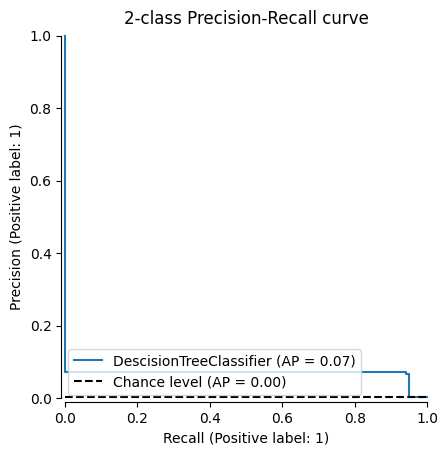

In [75]:
display = skmet.PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="DescisionTreeClassifier", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### ROC curve using AUC method

In [ ]:
print(f"Accuracy: {round(skmet.accuracy_score(y_test, y_pred) * 100, 2)}%")
# acuraccy has honestly improved after adding more features
print(f"Prescision: {round(skmet.precision_score(y_test, y_pred) * 100, 2)}%")
# terrible precision
print(f"Recall: {round(skmet.recall_score(y_test, y_pred) * 100, 2)}%")
# very good recall

# have discovered that both models have terrible precision but very good accuracy, suggesting a bias for fraud, likely due to the given category features only being categories where fraud is higher than non-fraud
# definitely needs more features

Accuracy: 95.26%
Prescision: 7.16%
Recall: 94.27%


### ROC curve using AUC method

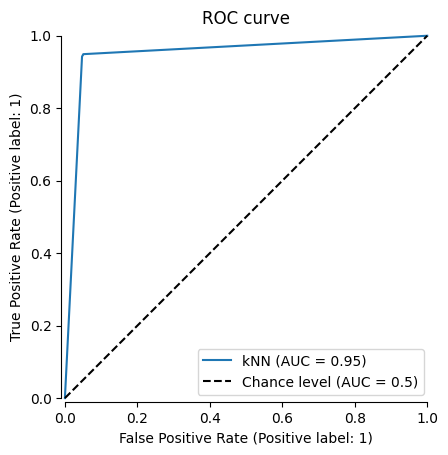

In [79]:
roc = skmet.RocCurveDisplay.from_estimator(
    clf, X_test, y_test, name="kNN", plot_chance_level=True, despine=True
)
_ = roc.ax_.set_title("ROC curve")

In [80]:
print(f"Area under curve: {skmet.roc_auc_score(y_test, y_pred)}")

Area under curve: 0.947662458681401
